# Network Anomaly Detection Using Machine Learning

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:190%"><b> Table of contents </b></h1>

- [**UNSW-NB15 Dataset**](#1)

     - [**Import and EDA**](#1_1)

     - [**Pre-processing and feature selection**](#1_2)

     - [**Modelling and Evaluation**](#1_3)
        - [**Random Forest**](#1_3_1)
        - [**LSTM (Keras)**](#1_3_2)

     - [**Evaluate**](#1_4)
    
- [**USB-IDS-1 Dataset**](#2)

     - [**Import and EDA**](#2_1)

     - [**Pre-processing and feature selection**](#2_2)

     - [**Modelling and Evaluation**](#2_3)
        - [**Random Forest**](#2_3_1)
        - [**LSTM (Keras)**](#2_3_2)

     - [**Evaluate**](#2_4)

<a id='1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:100%"> <b>UNSW-NB15 Dataset</b>

<a id='1_1'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Import and EDA</b>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
#Import the provided training and test data contaning 170K training records and 70K test records
df_train = pd.read_csv("./datasets/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("./datasets/UNSW_NB15_testing-set.csv")
#Concatenate them so we can do our own ratio and sampling, as well as not do preprocessing twice.
df = pd.concat([df_train, df_test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257673 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  sin

In [4]:
df.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [7]:
#Check for duplicates and missing values
print(df.duplicated().sum())
print("***")
print(df.isna().sum())

0
***
id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attac

### Data Analysis

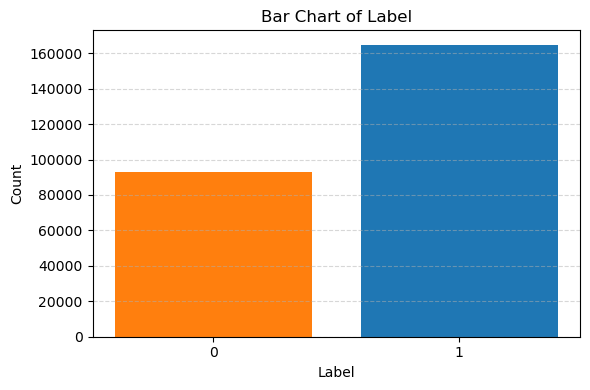

In [26]:
#Normal vs Attack Distribution

label_counts = df['label'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(6, 4))  
# Create a bar plot
bar_colors = ['#1f77b4', '#ff7f0e']  
ax.bar(label_counts.index, label_counts.values, color=bar_colors)

# Add labels and title
ax.set_xlabel('Label')
ax.set_ylabel('Count')
ax.set_title('Bar Chart of Label')

# Set the x-axis tick labels to 'normal' and 'attack'
plt.xticks([0, 1])

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.5)  

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_25756\2931720706.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis_r', len(sorted_attack_counts))


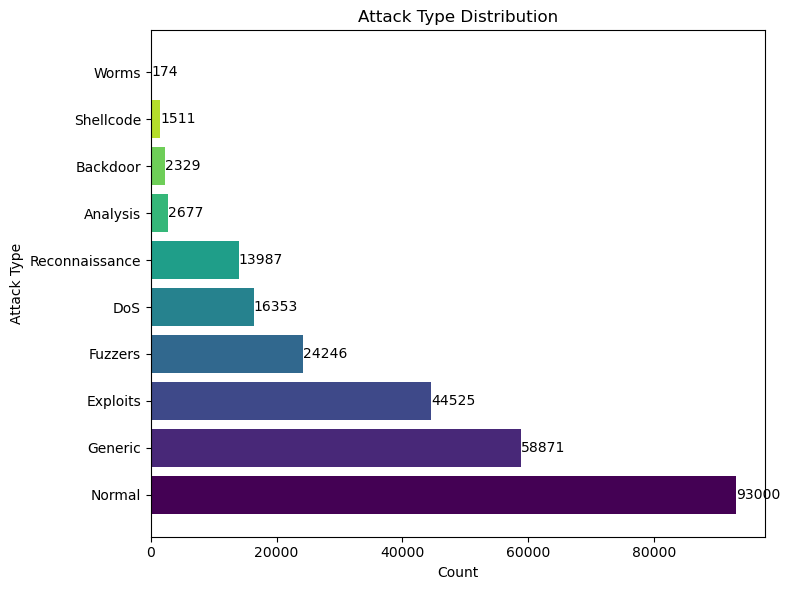

In [34]:
#Distribution of Attacks
attack_counts = df['attack_cat'].value_counts()

# Sort the attack types and counts in descending order
sorted_attack_counts = attack_counts.sort_values(ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(8, 6))  # Adjust the figsize as desired
# Define a color palette with a gradient effect
colors = plt.cm.get_cmap('viridis_r', len(sorted_attack_counts))

# Create the horizontal bar chart with the customized colors
bars = plt.barh(sorted_attack_counts.index, sorted_attack_counts.values, color=colors(np.arange(len(sorted_attack_counts))))

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Attack Type Distribution')

# Invert the y-axis to display the attack types in descending order
plt.gca().invert_yaxis()

# Add count values inside each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, str(int(width)), ha='left', va='center')

# Adjust spacing between bars
plt.tight_layout()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_15752\3573309978.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')


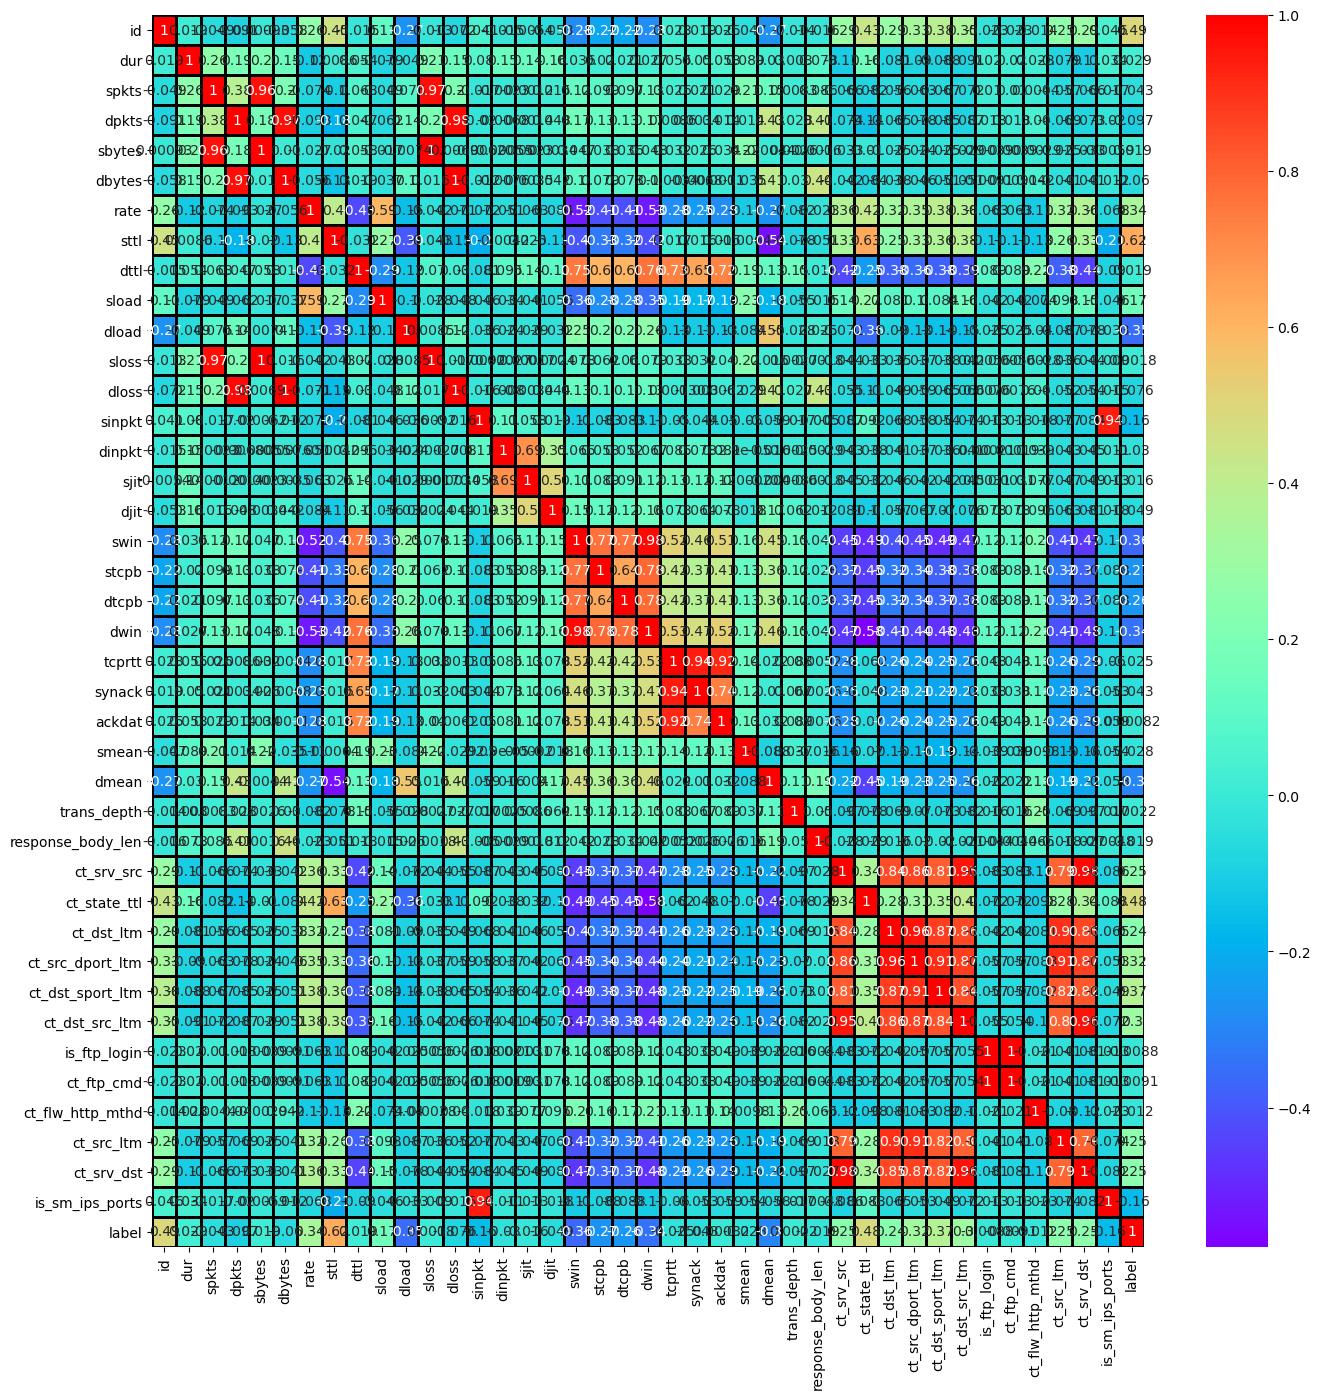

In [5]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')
plt.show()

<a id='1_2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:80%"> <b>Pre-processing and feature selection</b>

Data is clean and free of duplicates as seen from the EDA, however, some columns need to be adjusted for one hot encoding.
**id Column** has nothing to do with target data, so it will be dropped. **Attack category** column will also be dropped as we will only only predict if it is an attack or not. Maybe later try Attack category as label

In [28]:
df = df.drop(columns=['id', 'attack_cat'])

KeyError: "['id', 'attack_cat'] not found in axis"

In [9]:
df.head(1)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.08749,252,...,1,1,1,0,0,0,1,1,0,0


### Encode categorical features
Column **proto**, **service**, **state** all are categorical and therefore needs to be in numerical for machine learning algorithms.

In [11]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)

Index(['proto', 'service', 'state'], dtype='object')


In [12]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [16]:
df_encoded.head(1)

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


### Scaling / Normalization
Min max scaling was used to bring all features to the same scale

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

# Now df_scaled contains the scaled data

In [22]:
df_scaled.head(1)

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,...,state_CLO,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id='2'></a>
# <p style="padding: 10px;color:white; display:fill;background-color:#303090; border-radius:5px; font-size:100%"> <b>USB-IDS-1 Dataset</b>

In [24]:
#Import the provided training and test data contaning 170K training records and 70K test records
df1_train = pd.read_csv("./datasets/USB-IDS-1-TRAIN.csv")
df1_test = pd.read_csv("./datasets/USB-IDS-1-TEST.csv")
#Concatenate them so we can do our own ratio and sampling, as well as not do preprocessing twice.
df1 = pd.concat([df1_train, df1_test])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4091395 entries, 0 to 722026
Data columns (total 84 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Flow ID                     object 
 1   Src IP                      object 
 2   Src Port                    int64  
 3   Dst IP                      object 
 4   Dst Port                    int64  
 5   Protocol                    int64  
 6   Timestamp                   object 
 7   Flow Duration               int64  
 8   Total Fwd Packet            int64  
 9   Total Bwd packets           int64  
 10  Total Length of Fwd Packet  float64
 11  Total Length of Bwd Packet  float64
 12  Fwd Packet Length Max       float64
 13  Fwd Packet Length Min       float64
 14  Fwd Packet Length Mean      float64
 15  Fwd Packet Length Std       float64
 16  Bwd Packet Length Max       float64
 17  Bwd Packet Length Min       float64
 18  Bwd Packet Length Mean      float64
 19  Bwd Packet Length Std 

In [26]:
df1.head(10)

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.111.65-192.168.111.66-56924-80-6,192.168.111.65,56924,192.168.111.66,80,6,11/02/2021 11:16:52 AM,11264,6,4,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCPFlood-Evasive
1,192.168.111.65-192.168.111.66-37024-80-6,192.168.111.65,37024,192.168.111.66,80,6,11/02/2021 09:04:39 AM,160427,8,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-NoDefense
2,192.168.111.65-192.168.111.66-53004-80-6,192.168.111.65,53004,192.168.111.66,80,6,11/02/2021 09:06:09 AM,138656,7,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-NoDefense
3,*.*.*.*-192.168.111.66-64442-80-6,*.*.*.*,64442,192.168.111.66,80,6,07/06/2021 12:43:34 AM,30536093,37,28,...,32,5499861.0,0.0,5499861.0,5499861.0,25036202.0,0.0,25036202.0,25036202.0,BENIGN
4,192.168.111.65-192.168.111.66-49406-80-6,192.168.111.65,49406,192.168.111.66,80,6,11/02/2021 09:05:02 AM,25545,7,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-NoDefense
5,192.168.111.65-192.168.111.66-48736-80-6,192.168.111.65,48736,192.168.111.66,80,6,09/09/2021 05:10:41 PM,311609,7,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-Security2
6,192.168.111.65-192.168.111.66-60954-80-6,192.168.111.65,60954,192.168.111.66,80,6,11/02/2021 10:00:30 AM,66333,8,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-Reqtimeout
7,192.168.111.65-192.168.111.66-58542-80-6,192.168.111.65,58542,192.168.111.66,80,6,11/02/2021 11:04:45 AM,565423,6,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hulk-Evasive
8,*.*.*.*-192.168.111.66-55325-80-6,*.*.*.*,55325,192.168.111.66,80,6,06/06/2021 10:15:16 PM,15235818,20,16,...,32,5267626.0,0.0,5267626.0,5267626.0,9968145.0,0.0,9968145.0,9968145.0,BENIGN
9,192.168.111.65-192.168.111.66-37909-80-6,192.168.111.65,37909,192.168.111.66,80,6,11/02/2021 10:14:26 AM,19347,21,19,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCPFlood-Reqtimeout


C:\Users\LEGION\AppData\Local\Temp\ipykernel_15752\112048245.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')


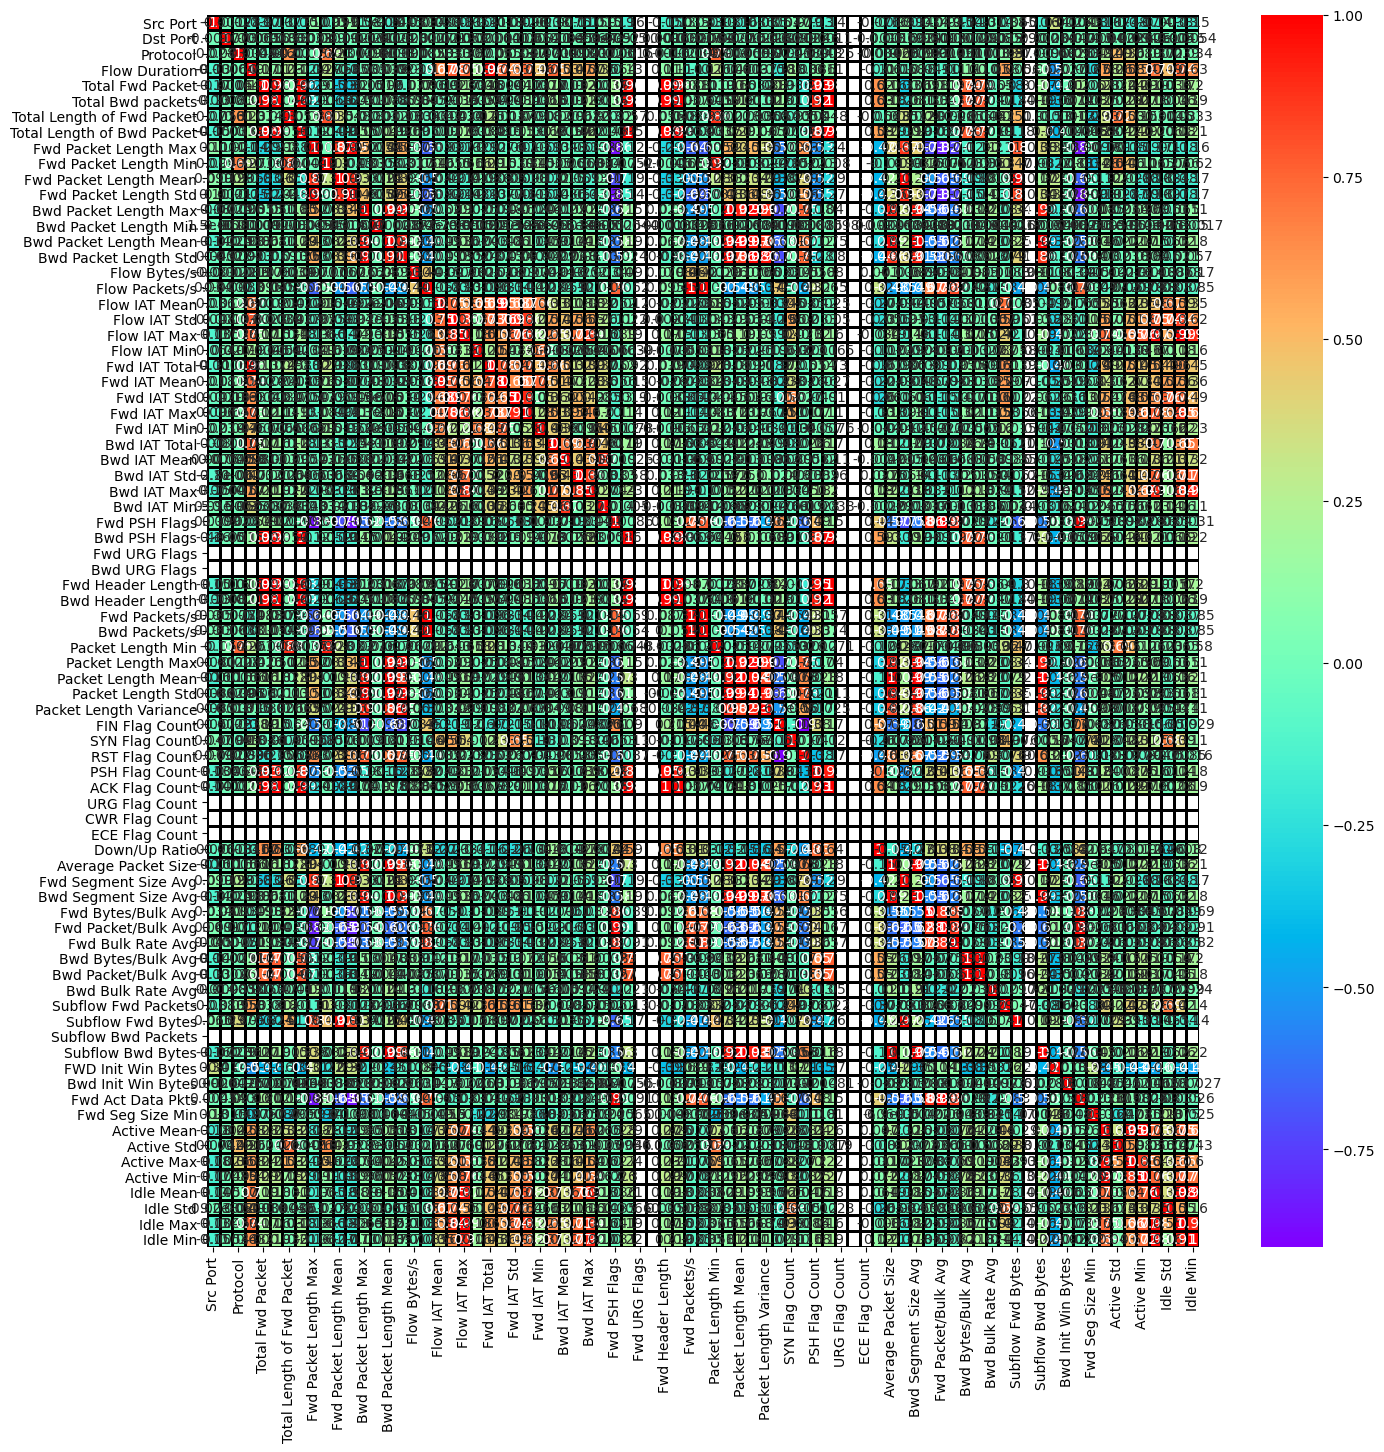

In [27]:
plt.figure(figsize=(16,16))
sns.heatmap(df1.corr(), annot=True, linecolor='black', linewidths=1, cmap='rainbow')
plt.show()